## Logistic Regression

In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv', sep=';')
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)
df.to_csv('dataset.csv', sep=';', index=False)

In [2]:
df.sample(20)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1971,1,8,1,6,1,1,1,2,14,3,...,0,6,8,6,12.142857,0,8.9,1.4,3.51,Graduate
1938,1,12,1,6,1,1,1,13,14,5,...,1,6,12,1,12.000000,0,13.9,-0.3,0.79,Dropout
237,1,8,2,10,1,1,1,22,27,4,...,0,6,9,6,11.571429,0,15.5,2.8,-4.06,Graduate
4125,1,14,1,12,1,1,1,23,14,6,...,0,8,8,7,11.971429,0,12.7,3.7,-1.70,Enrolled
2749,2,12,1,17,0,1,1,22,27,10,...,0,5,6,5,11.600000,1,7.6,2.6,0.32,Dropout
2247,1,14,2,12,1,1,1,13,1,10,...,0,8,8,0,0.000000,8,9.4,-0.8,-3.12,Enrolled
483,1,15,1,6,1,14,1,23,28,10,...,1,6,12,2,13.000000,0,13.9,-0.3,0.79,Enrolled
3776,1,15,1,4,1,14,1,3,1,3,...,0,6,10,6,13.000000,0,16.2,0.3,-0.92,Graduate
2238,1,12,1,8,1,1,1,13,1,29,...,0,6,12,3,11.333333,0,16.2,0.3,-0.92,Enrolled
2472,1,1,1,14,1,1,1,1,1,10,...,0,6,10,3,10.333333,0,10.8,1.4,1.74,Dropout


In [3]:
df.shape

(4424, 35)

In [4]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print(categorical)

['Target']


In [7]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

## Target impalance check

In [68]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [8]:
import warnings

warnings.filterwarnings('ignore')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df[categorical].isnull().sum()

Target    0
dtype: int64

In [11]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

In [12]:
df['Application mode'].unique()

array([ 8,  6,  1, 12,  9, 17, 15, 16, 14,  4, 13,  7,  3,  2,  5, 18, 10,
       11], dtype=int64)

In [13]:
df['Application order'].unique()

array([5, 1, 2, 4, 3, 6, 9, 0], dtype=int64)

In [14]:
df['Course'].unique()

array([ 2, 11,  5, 15,  3, 17, 12, 10, 14, 16,  6,  8, 13,  9,  4,  1,  7],
      dtype=int64)

Text(0, 0.5, 'freq')

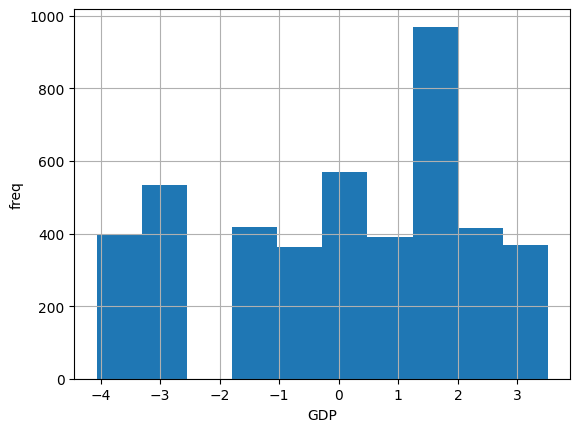

In [16]:
fig = df.GDP.hist(bins=10)
fig.set_xlabel('GDP')
fig.set_ylabel('freq')

Text(0, 0.5, 'freq')

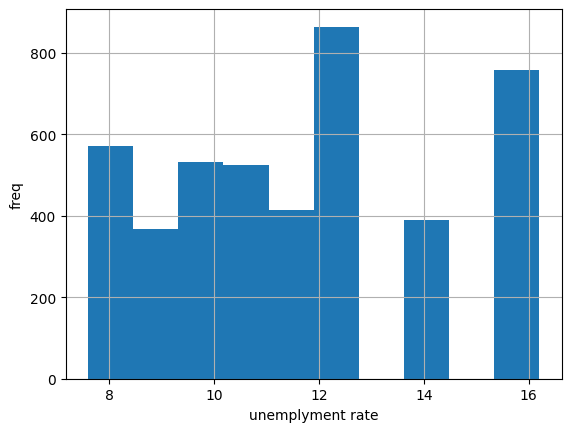

In [17]:
fig = df['Unemployment rate'].hist(bins=10)
fig.set_xlabel('unemplyment rate')
fig.set_ylabel('freq')

In [18]:
X = df.drop(['Target'], axis=1)

y = df[['Target']]

In [19]:
df = pd.get_dummies(df, columns=['Target'])

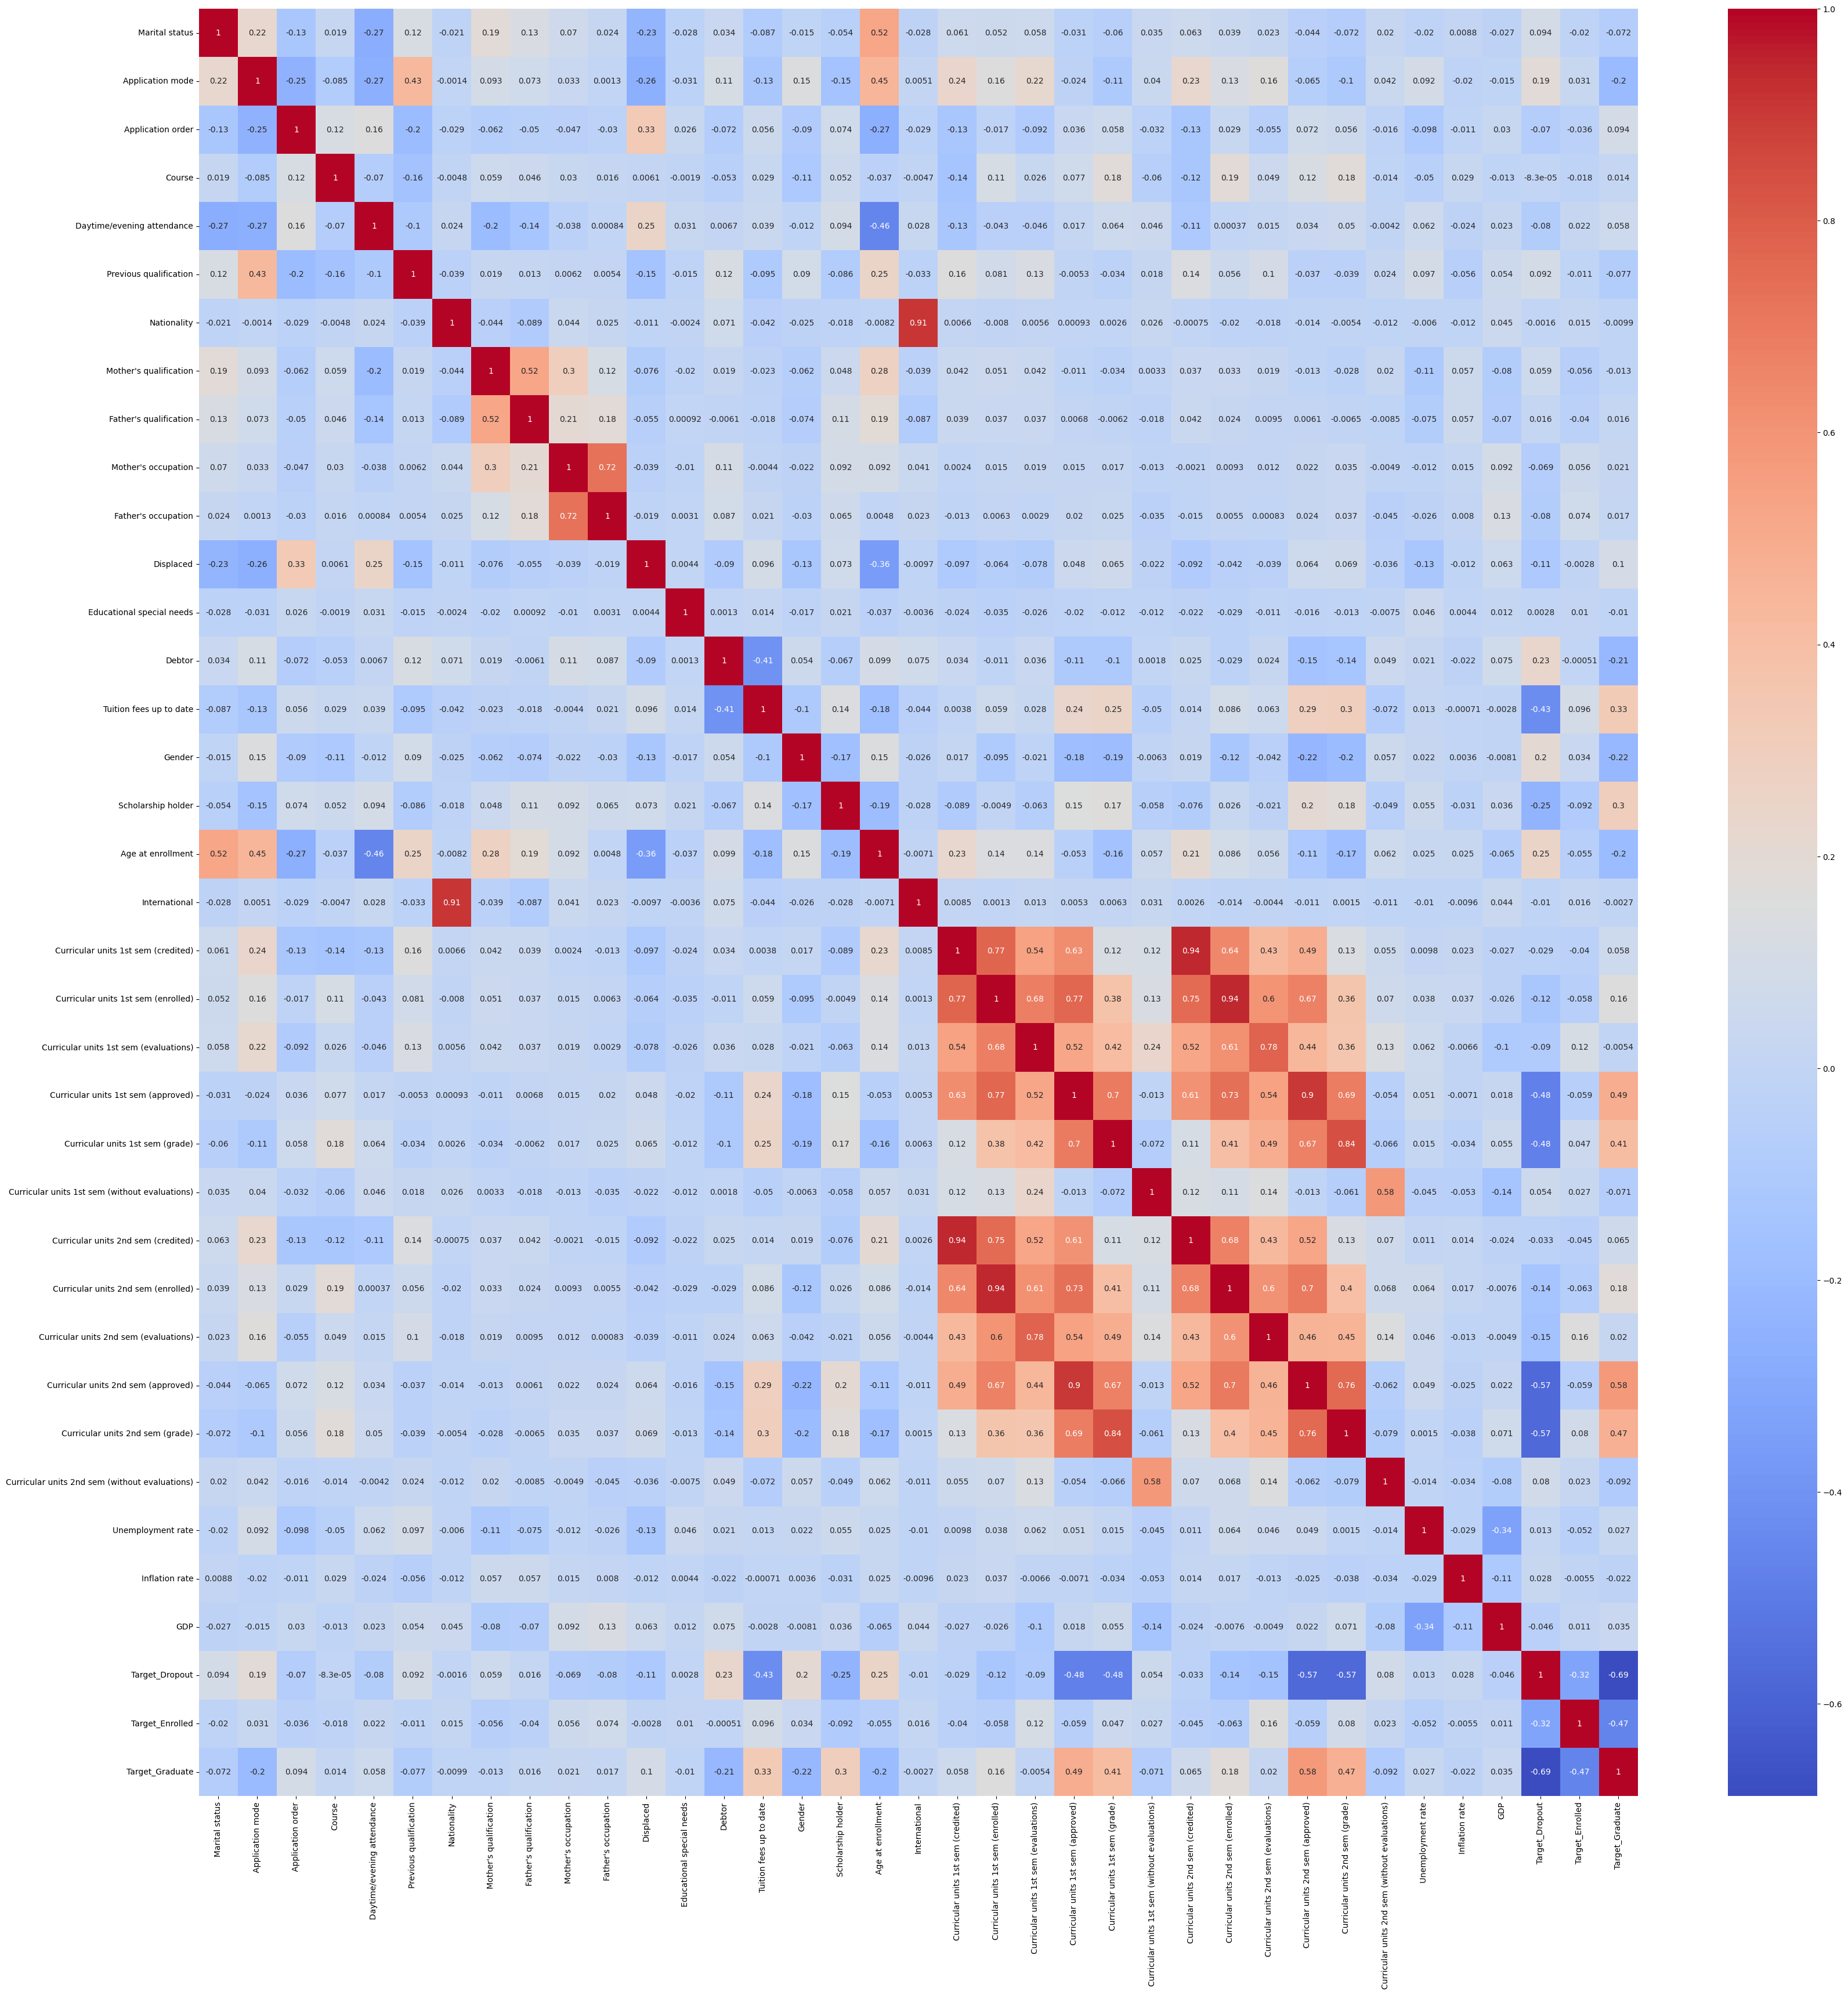

In [20]:
corr_matrix = df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((3539, 34), (885, 34))

In [22]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
X_train[numerical].isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [23]:
X_train[numerical].describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,...,3539.000000,3539.000000,3539.000000,3539.00000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,1.177734,6.871715,1.739192,9.877932,0.886126,2.498446,1.276067,12.428652,16.493642,7.382594,...,0.139022,0.552981,6.238203,8.08816,4.442215,10.239767,0.151173,11.579203,1.233004,0.010800
std,0.598001,5.309254,1.318893,4.343090,0.317703,3.925851,1.809878,9.035805,11.015799,4.070464,...,0.677841,1.925170,2.189328,3.93016,3.018734,5.194185,0.739372,2.661734,1.380418,2.273905
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.00000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.00000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.00000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,20.000000,29.000000,33.000000,32.000000,...,12.000000,19.000000,23.000000,28.00000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [24]:
cols = X_train.columns

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [47]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [48]:
X_train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,...,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03,3.539000e+03
mean,-5.521313e-17,1.305038e-17,-2.409300e-16,1.124340e-16,-4.818600e-17,-2.007750e-17,-1.606200e-17,-6.023250e-18,-1.254844e-18,1.310057e-16,...,-7.027125e-18,5.621700e-17,3.473408e-16,3.634028e-16,-1.279941e-16,3.714338e-17,-8.031000e-18,1.405425e-17,9.536813e-18,4.517438e-17
std,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,...,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00,1.000141e+00
min,-2.972555e-01,-1.106096e+00,-1.318862e+00,-2.044440e+00,-2.789559e+00,-3.817408e-01,-1.525548e-01,-1.264997e+00,-1.406692e+00,-1.568248e+00,...,-2.051246e-01,-2.872781e-01,-2.849771e+00,-2.058263e+00,-1.471757e+00,-1.971669e+00,-2.044897e-01,-1.495178e+00,-1.472954e+00,-1.790477e+00
25%,-2.972555e-01,-1.106096e+00,-5.605431e-01,-8.930232e-01,3.584796e-01,-3.817408e-01,-1.525548e-01,-1.154311e+00,-1.225109e+00,-5.854200e-01,...,-2.051246e-01,-2.872781e-01,-5.656428e-01,-5.313921e-01,-8.091340e-01,1.078730e-01,-2.044897e-01,-8.188312e-01,-6.759806e-01,-7.524683e-01
50%,-2.972555e-01,2.125429e-01,-5.605431e-01,2.811032e-02,3.584796e-01,-3.817408e-01,-1.525548e-01,6.324047e-02,-2.264016e-01,-3.397130e-01,...,-2.051246e-01,-2.872781e-01,-1.088172e-01,-2.243496e-02,1.848005e-01,3.774433e-01,-2.044897e-01,-1.800596e-01,1.209923e-01,1.359969e-01
75%,-2.972555e-01,9.660510e-01,1.977757e-01,7.189604e-01,3.584796e-01,-3.817408e-01,-1.525548e-01,1.059419e+00,9.538884e-01,6.431149e-01,...,-2.051246e-01,-2.872781e-01,3.480085e-01,4.865221e-01,5.161119e-01,5.956668e-01,-2.044897e-01,8.720347e-01,9.904174e-01,7.825532e-01
max,8.065122e+00,2.096313e+00,5.506008e+00,1.640094e+00,3.584796e-01,3.694384e+00,1.034687e+01,1.834224e+00,1.498638e+00,6.048668e+00,...,1.750063e+01,9.583375e+00,7.657219e+00,5.067136e+00,5.154473e+00,1.604263e+00,1.602779e+01,1.736255e+00,1.787390e+00,1.539068e+00


In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=41)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=41, solver='liblinear')

In [50]:
y_pred_test = logreg.predict(X_test)

y_pred_test[:5]

array(['Graduate', 'Dropout', 'Graduate', 'Graduate', 'Dropout'],
      dtype=object)

In [51]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7831


In [52]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['Enrolled', 'Graduate', 'Dropout', ..., 'Graduate', 'Graduate',
       'Graduate'], dtype=object)

In [53]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7706


In [54]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7706
Test set score: 0.7831


In [55]:
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=41)

logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=41, solver='liblinear')

In [56]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7711
Test set score: 0.7842


In [57]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=41)

logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=41, solver='liblinear')

In [58]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.7567
Test set score: 0.7831


In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[223  22  39]
 [ 44  43  64]
 [ 14   9 427]]


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

     Dropout       0.79      0.79      0.79       284
    Enrolled       0.58      0.28      0.38       151
    Graduate       0.81      0.95      0.87       450

    accuracy                           0.78       885
   macro avg       0.73      0.67      0.68       885
weighted avg       0.76      0.78      0.76       885



## K-Fold Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.76694915 0.76271186 0.74858757 0.76553672 0.7553041 ]


In [62]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7598


In [63]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=41, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [64]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7601


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=41, solver='liblinear')


In [65]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.7864
